In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import stats

In [35]:
### Read values from txt file
temp=np.array([]) 
resis=np.array([]) 
with open("PT100_hotload_04032024.txt", "r") as filestream:
    for line in filestream:
        fields=line.split(",")
        r=float(fields[1])
        resis = np.append(resis,r) 
        t=float(fields[2])
        temp = np.append(temp,t)
# print(resis)
# print(temp)
print(len(resis))


temp_cold=np.array([]) 
resis_cold=np.array([]) 
with open("PT100_coldload_04032024.txt", "r") as filestream1:
    for line in filestream1:
        fields=line.split(",")
        r=float(fields[1])
        resis_cold = np.append(resis_cold,r) 
        t=float(fields[3])
        temp_cold = np.append(temp_cold,t)
print(len(resis_cold))

1468
2025


In [43]:
### For full scale (heat load plus cold load points
temperature=np.array([])
resistance=np.array([])
temperature=np.append(temperature,temp_cold)
temperature=np.append(temperature,temp)
resistance=np.append(resistance,resis_cold)
resistance=np.append(resistance,resis)

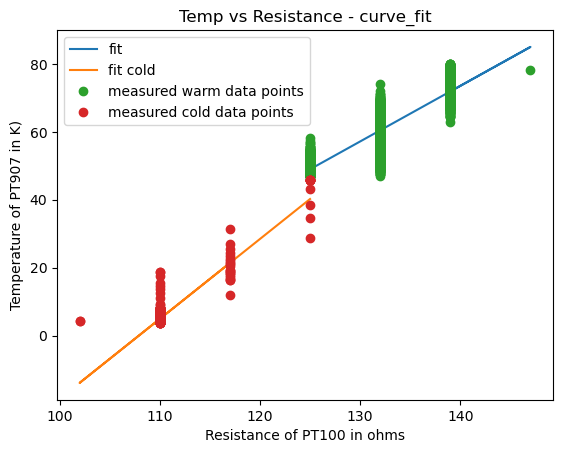

In [58]:
### Using curve fit, fitting hot load and cold load separately 
def f(x, A1, B1): # this is your 'straight line' y=f(x)
    return A1*x + B1

# slope=np.zeros(len(resis))
# inter=np.zeros(len(resis))
# for i in range(len(resis)):
#     popt, pcov = curve_fit(f, resis, temp) # your data x, y to fit 
#     print(popt)
#     #popt[0], popt[1] would be the slope and intercept of the straight line
#     slope[i]=popt[0]
#     inter[i]=popt[1]
popt, pcov = curve_fit(f, resis, temp)
popt1, pcov1 = curve_fit(f, resis_cold, temp_cold)
plt.plot(resis,popt[0]*resis+popt[1],label='fit')   
plt.plot(resis_cold,popt1[0]*resis_cold+popt1[1],label='fit cold')  
plt.plot(resis,temp,'o',label='measured warm data points')  
plt.plot(resis_cold,temp_cold,'o',label='measured cold data points') 
plt.xlabel("Resistance of PT100 in ohms")
plt.ylabel("Temperature of PT907 in K)")
plt.title("Temp vs Resistance - curve_fit")
plt.legend()
plt.show()


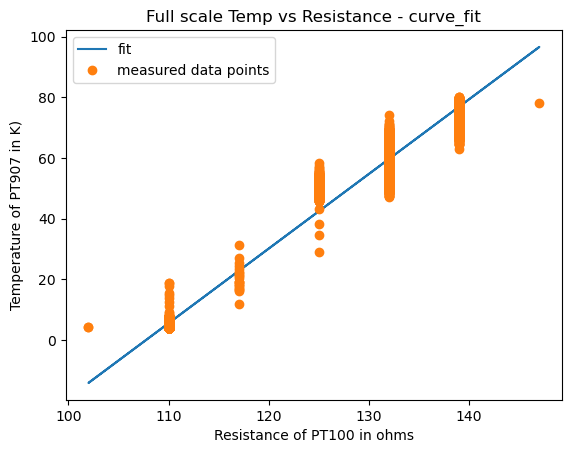

In [62]:
### For full scale (hot load plus cold load)
def f(x, A1, B1): # this is your 'straight line' y=f(x)
    return A1*x + B1

popt, pcov = curve_fit(f, resistance, temperature)
plt.plot(resistance,popt[0]*resistance+popt[1],label='fit') 
plt.plot(resistance,temperature,'o',label='measured data points') 
plt.xlabel("Resistance of PT100 in ohms")
plt.ylabel("Temperature of PT907 in K)")
plt.title("Full scale Temp vs Resistance - curve_fit")
plt.legend()
plt.show()

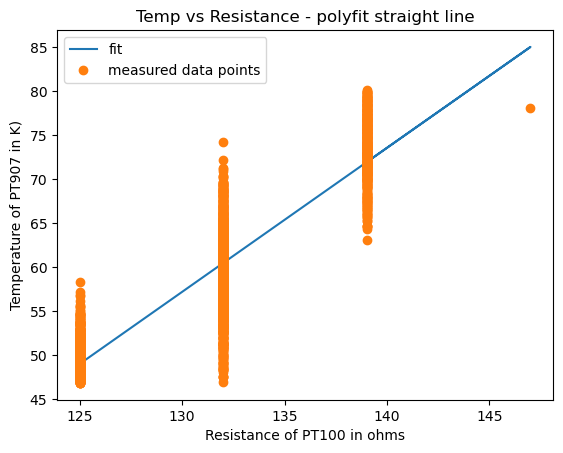

In [28]:
### Using polyfit and straight line
slopepf, interpf = np.polyfit(resis, temp, deg=1)
plt.plot(resis,slopepf*resis+interpf,label='fit')
plt.plot(resis,temp,'o',label='measured data points')
plt.xlabel("Resistance of PT100 in ohms")
plt.ylabel("Temperature of PT907 in K)")
plt.title("Temp vs Resistance - polyfit straight line")
plt.legend()
plt.show()

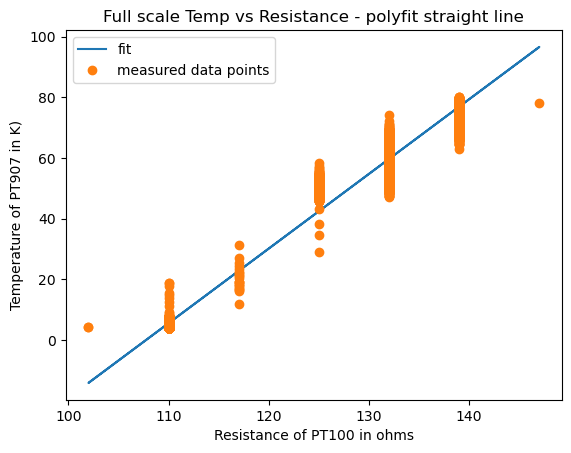

In [53]:
### Using polyfit and straight line 
### For full scale (hot load plus cold load)
slopepf1, interpf1 = np.polyfit(resistance, temperature, deg=1)
plt.plot(resistance,slopepf1*resistance+interpf1,label='fit')
plt.plot(resistance,temperature,'o',label='measured data points')
plt.xlabel("Resistance of PT100 in ohms")
plt.ylabel("Temperature of PT907 in K)")
plt.title("Full scale Temp vs Resistance - polyfit straight line")
plt.legend()
plt.show()

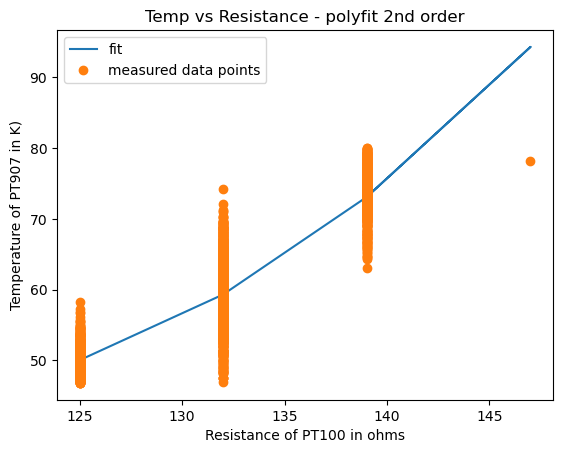

In [30]:
### Using polyfit and quadratic poly
coeff2 = np.polyfit(resis,temp,2)
plt.plot(resis,coeff2[0]*resis**2+coeff2[1]*resis+coeff2[2],label='fit')
plt.xlabel("Resistance of PT100 in ohms")
plt.plot(resis,temp,'o',label='measured data points')
plt.ylabel("Temperature of PT907 in K)")
plt.title("Temp vs Resistance - polyfit 2nd order")
plt.legend()
plt.show()

[-3.53305568e-02  1.11033750e+01 -7.88910102e+02]


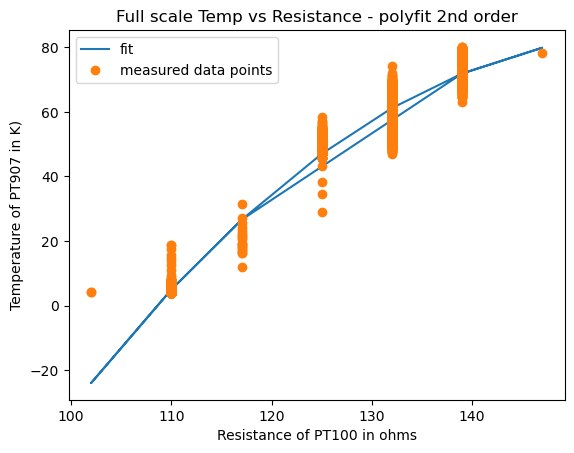

In [61]:
### Using polyfit and quadratic poly
### For full scale (hot load plus cold load)
coeff22 = np.polyfit(resistance,temperature,2)
print(coeff22)
plt.plot(resistance,coeff22[0]*resistance**2+coeff22[1]*resistance+coeff22[2],label='fit')
plt.xlabel("Resistance of PT100 in ohms")
plt.plot(resistance,temperature,'o',label='measured data points')
plt.ylabel("Temperature of PT907 in K)")
plt.title("Full scale Temp vs Resistance - polyfit 2nd order")
plt.legend()
plt.show()

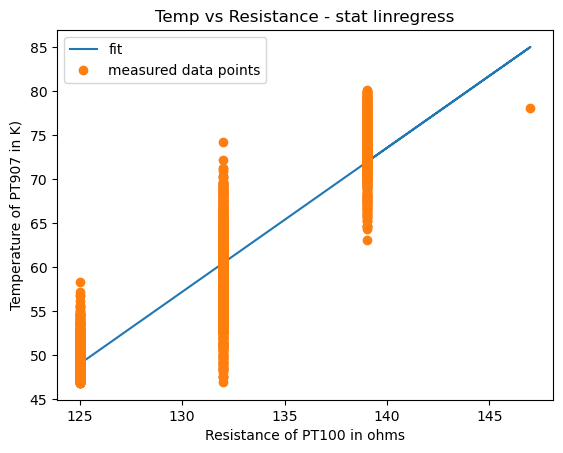

In [31]:
### Using numpy stats linregress: linear least-squares regression 
slope_s, inter_s, r_value, p_value, std_err = stats.linregress(resis,temp)
plt.plot(resis,slope_s*resis+inter_s,label='fit')
plt.plot(resis,temp,'o',label='measured data points')
plt.xlabel("Resistance of PT100 in ohms")
plt.ylabel("Temperature of PT907 in K)")
plt.title("Temp vs Resistance - stat linregress")
plt.legend()
plt.show()

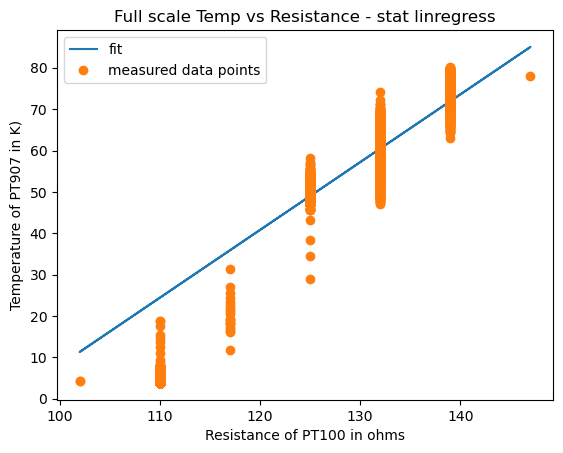

In [55]:
### Using numpy stats linregress: linear least-squares regression 
### For full scale (hot load plus cold load)
slope_s1, inter_s1, r_value, p_value, std_err = stats.linregress(resis,temp)
plt.plot(resistance,slope_s1*resistance+inter_s1,label='fit')
plt.plot(resistance,temperature,'o',label='measured data points')
plt.xlabel("Resistance of PT100 in ohms")
plt.ylabel("Temperature of PT907 in K)")
plt.title("Full scale Temp vs Resistance - stat linregress")
plt.legend()
plt.show()

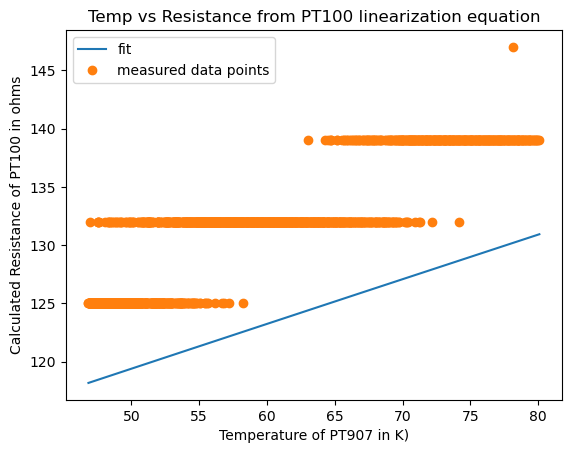

In [32]:
### Callendar-Van Dusen equation
### Rt = R0 (1 + A*t + B * t**2 + C*(t - 100)*t**3)   

R0 = 100 #enter value of resistance at temp of 0 deg C
A = 3.9083*10**(-3)
B = -5.775*10**(-7)
C = -4.183*10**(-12)
resis1=np.zeros(len(temp))
for i in range(len(temp)):
    #resis1[i]=R0*(1+A*temp[i] + B * temp[i]**2 + C*(temp[i] - 100)*temp[i]**3) 
    if(temp[i]>0):
       resis1[i]=R0*(1+A*temp[i] + B * temp[i]**2)
    else:
       resis1[i]=R0*(1+A*temp[i] + B * temp[i]**2 + C*(temp[i] - 100)*temp[i]**3) 

plt.plot(temp,resis1,label='fit') 
plt.plot(temp,resis,'o',label='measured data points')
plt.ylabel("Calculated Resistance of PT100 in ohms")
plt.xlabel("Temperature of PT907 in K)")
plt.title("Temp vs Resistance from PT100 linearization equation")
plt.legend()
plt.show()


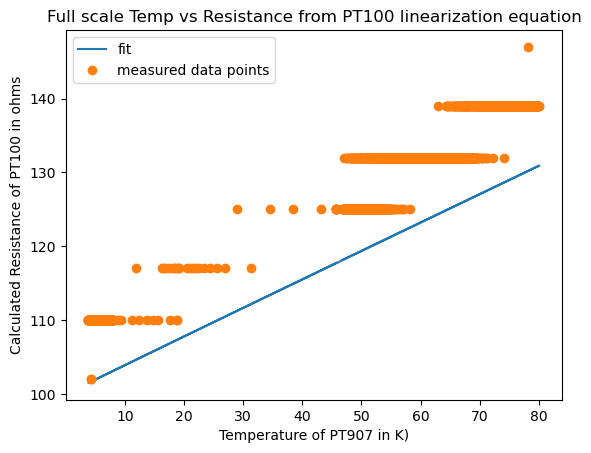

In [54]:
### Callendar-Van Dusen equation
### Rt = R0 (1 + A*t + B * t**2 + C*(t - 100)*t**3)   
### For full scale (hot load plus cold load)

R0 = 100 #enter value of resistance at temp of 0 deg C
A = 3.9083*10**(-3)
B = -5.775*10**(-7)
C = -4.183*10**(-12)
resis11=np.zeros(len(resistance))
for i in range(len(temperature)):
    #resis1[i]=R0*(1+A*temp[i] + B * temp[i]**2 + C*(temp[i] - 100)*temp[i]**3) 
    if(temperature[i]>0):
       resis11[i]=R0*(1+A*temperature[i] + B * temperature[i]**2)
    else:
       resis1[i]=R0*(1+A*temperature[i] + B * temperature[i]**2 + C*(temperature[i] - 100)*temperature[i]**3) 

plt.plot(temperature,resis11,label='fit') 
plt.plot(temperature,resistance,'o',label='measured data points')
plt.ylabel("Calculated Resistance of PT100 in ohms")
plt.xlabel("Temperature of PT907 in K)")
plt.title("Full scale Temp vs Resistance from PT100 linearization equation")
plt.legend()
plt.show()
